# COVID-19 Time Series CSV Analysis US

In [135]:
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

import urllib.request

#See:
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

#Download the latest CSV file
urllib.request.urlretrieve('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv','Documents/time_series_covid19_confirmed_global.csv')

('Documents/time_series_covid19_confirmed_global.csv',
 <http.client.HTTPMessage at 0x215edc53a88>)

In [136]:
time_series_file = "Documents/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(time_series_file)
print(df.head())

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/15/20  3/16/20  3/17/20  3/18/20  \
0        0        0        0  ...       16       21       22       22   
1        0        0        0  ...       42       51       55       59   
2        0        0        0  ...       48       54       60       74   
3        0        0        0  ...        1        2       39       39   
4        0        0        0  ...        0        0        0        0   

   3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  
0       22       24   

In [137]:
df.set_index(['Province/State', 'Country/Region'])

Lat        Long  1/22/20  1/23/20  \
Province/State Country/Region                                            
NaN            Afghanistan     33.000000   65.000000        0        0   
               Albania         41.153300   20.168300        0        0   
               Algeria         28.033900    1.659600        0        0   
               Andorra         42.506300    1.521800        0        0   
               Angola         -11.202700   17.873900        0        0   
...                                  ...         ...      ...      ...   
               Timor-Leste     -8.874217  125.727539        0        0   
               Belize          13.193900  -59.543200        0        0   
Recovered      Canada           0.000000    0.000000        0        0   
NaN            Laos            19.856270  102.495496        0        0   
               Libya           26.335100   17.228331        0        0   

                               1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Province/State Country/Region                                                
NaN            Afghanistan           0        0        0        0        0   
               Albania               0        0        0        0        0   
               Algeria               0        0        0        0        0   
               Andorra               0        0        0        0        0   
               Angola                0        0        0        0        0   
...                                ...      ...      ...      ...      ...   
               Timor-Leste           0        0        0        0        0   
               Belize                0        0        0        0        0   
Recovered      Canada                0        0        0        0        0   
NaN            Laos                  0        0        0        0        0   
               Libya                 0        0        0        0        0   

                               1/29/20  ...  3/15/20  3/16/20  3/17/20  \
Province/State Country/Region           ...                              
NaN            Afghanistan           0  ...       16       21       22   
               Albania               0  ...       42       51       55   
               Algeria               0  ...       48       54       60   
               Andorra               0  ...        1        2       39   
               Angola                0  ...        0        0        0   
...                                ...  ...      ...      ...      ...   
               Timor-Leste           0  ...        0        0        0   
               Belize                0  ...        0        0        0   
Recovered      Canada                0  ...        0        0        0   
NaN            Laos                  0  ...        0        0        0   
               Libya                 0  ...        0        0        0   

                               3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
Province/State Country/Region                                                
NaN            Afghanistan          22       22       24       24       40   
               Albania              59       64       70       76       89   
               Algeria              74       87       90      139      201   
               Andorra              39       53       75       88      113   
               Angola                0        0        1        2        2   
...                                ...      ...      ...      ...      ...   
               Timor-Leste           0        0        0        0        1   
               Belize                0        0        0        0        0   
Recovered      Canada                0        0        0        0        0   
NaN            Laos                  0        0        0        0        0   
               Libya                 0        0        0        0        0   

                               3/23/20  3/24/20  
Province/State Country/Region  

In [138]:
#Read the dates from the headers
headers = list(df.columns.values)
del headers[0:43]
print(headers)

['3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20']


In [139]:
df.loc[df['Country/Region'] == 'US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,3499,4632,6421,7783,13677,19100,25489,33276,43847,53740


In [140]:
rownum = df.loc[df['Country/Region'] == 'US'].index[0]
print(rownum)

225


In [141]:
#dates = ['3/1/20','3/2/20','3/3/20','3/4/20','3/5/20','3/6/20','3/7/20','3/8/20','3/9/20','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20','3/15/20','3/16/20','3/17/20','3/18/20','3/19/20','3/20/20','3/21/20','3/22/20']
#cases = df.loc[226, '3/1/20':'3/22/20']
dates = headers[:]
cases = df.loc[rownum, dates[0]:dates[-1]]
state = df.loc[rownum, 'Province/State':'Country/Region']

print(state,dates,cases)


Province/State    NaN
Country/Region     US
Name: 225, dtype: object ['3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20'] 3/1/20        74
3/2/20        98
3/3/20       118
3/4/20       149
3/5/20       217
3/6/20       262
3/7/20       402
3/8/20       518
3/9/20       583
3/10/20      959
3/11/20     1281
3/12/20     1663
3/13/20     2179
3/14/20     2727
3/15/20     3499
3/16/20     4632
3/17/20     6421
3/18/20     7783
3/19/20    13677
3/20/20    19100
3/21/20    25489
3/22/20    33276
3/23/20    43847
3/24/20    53740
Name: 225, dtype: object


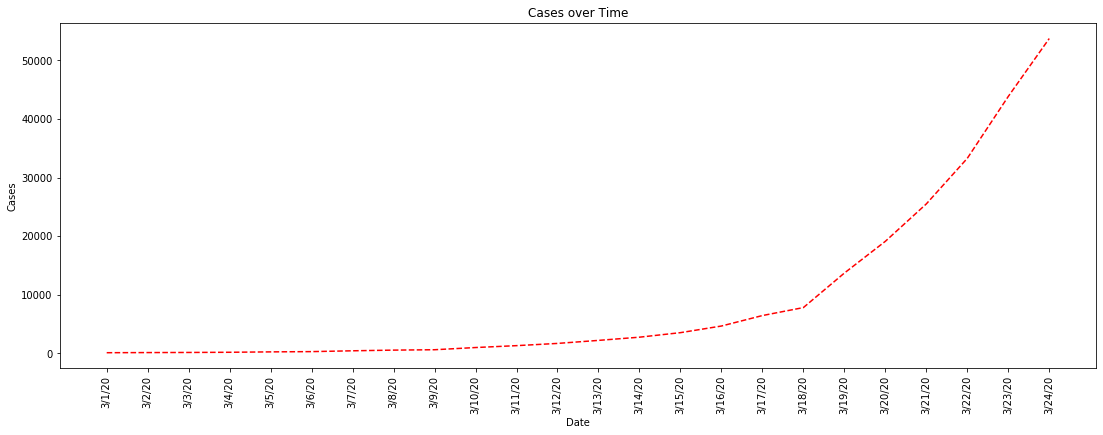

In [142]:
fig = plt.figure(figsize=(18,6))
axes = fig.add_axes([0,0,0.8,0.8])

axes.plot(dates, cases, 'r--') # Create line plot with red dashed line
plt.title('Cases over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.show()

In [143]:
datetimes = [pd.to_datetime(date, infer_datetime_format=True).dayofyear for date in dates]
print(datetimes)

[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]


In [144]:
x = np.array(datetimes)
y = np.array(cases)
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)

#print(x,y)

In [145]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
x_trainp, x_testp, y_trainp, y_testp = train_test_split(x, y, test_size=0.2, random_state=0)

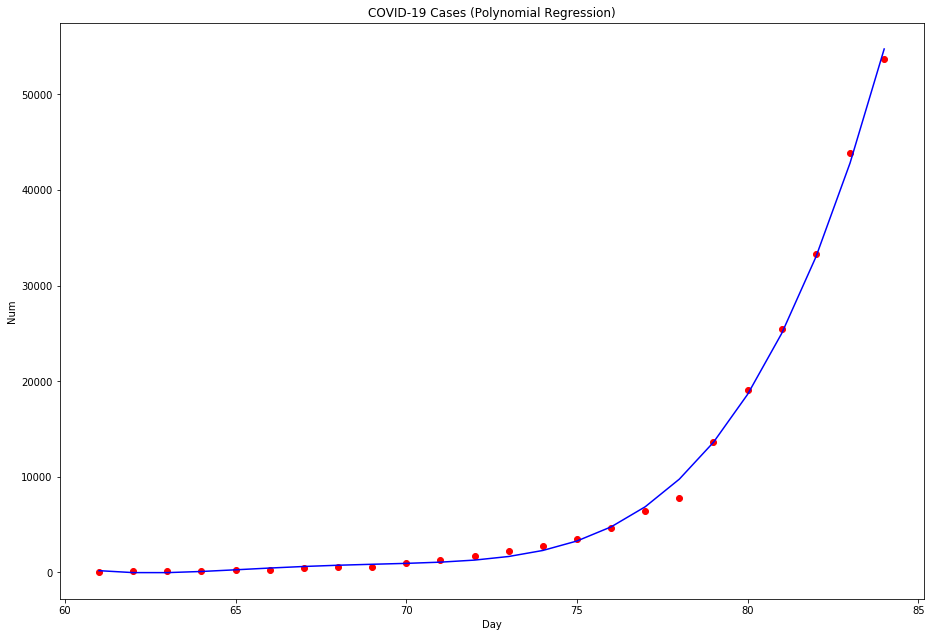

In [146]:
# Fitting Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    fig = plt.figure(figsize=(15,10))
    axes = fig.add_axes([0.0,0.0,0.8,0.8])
    axes.scatter(x, y, color='red')
    axes.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')
    axes.ticklabel_format(useOffset=False, style='plain')    
    #plt.scatter(x, y, color='red')
    #plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')
    plt.title('COVID-19 Cases (Polynomial Regression)')
    plt.xlabel('Day')
    plt.ylabel('Num')
    plt.show()
    return
viz_polymonial()

In [147]:
# March 30th Polymonial Regression Prediction (210K)
march_30 = pd.to_datetime('03/30/2020', infer_datetime_format=True).dayofyear
prediction_march_30 = pol_reg.predict(poly_reg.fit_transform([[march_30]]))
print("Prediction March 30th:", march_30, prediction_march_30)

Prediction March 30th: 90 [[187506.45620779]]


In [148]:
# April 27th Polymonial Regression Prediction (5.6M)
april_27 = pd.to_datetime('04/27/2020', infer_datetime_format=True).dayofyear
prediction_april_27 = pol_reg.predict(poly_reg.fit_transform([[april_27]]))
print("Prediction April 27th:", prediction_april_27)

Prediction April 27th: [[4728532.01935698]]


In [149]:
# May 29th Polymonial Regression Prediction (41M)
jun_01 = pd.to_datetime('06/01/2020', infer_datetime_format=True).dayofyear
prediction_jun_01 = pol_reg.predict(poly_reg.fit_transform([[jun_01]]))
print("Prediction June 1st (90 days):", prediction_jun_01)

Prediction June 1st (90 days): [[38706648.24953876]]


In [181]:
import datetime

#Add more days and predictions per day to the arrays and plot display
casesfuture = cases.values
datetimesfuture = datetimes[:]
datesfuture = [pd.to_datetime(date, infer_datetime_format=True) for date in dates]
nowstart = datesfuture[-1].strftime("%m/%d/%Y")
nowend = (datesfuture[-1] + datetime.timedelta(days=1)).strftime("%m/%d/%Y")

for dayofyear in range(datetimes[-1] + 1, datetimes[-1] + 30):
    datetimesfuture.append(dayofyear)
    datesfuture.append(datesfuture[-1] + datetime.timedelta(days=1)) 
    numpredict = pol_reg.predict(poly_reg.fit_transform([[dayofyear]])).item(0,0)
    if numpredict < 0:
        numpredict = 0.0
    casesfuture = np.append(casesfuture, numpredict)   

# Convert all datetimes to strings for xlabel
datesfuture[:] = [date.strftime("%m/%d/%Y") for date in datesfuture]
    
print(datesfuture, datetimesfuture, casesfuture)

['03/01/2020', '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020', '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020', '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020', '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020', '03/22/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/28/2020', '03/29/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/02/2020', '04/03/2020', '04/04/2020', '04/05/2020', '04/06/2020', '04/07/2020', '04/08/2020', '04/09/2020', '04/10/2020', '04/11/2020', '04/12/2020', '04/13/2020', '04/14/2020', '04/15/2020', '04/16/2020', '04/17/2020', '04/18/2020', '04/19/2020', '04/20/2020', '04/21/2020', '04/22/2020'] [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113] [74 98 118 149 217 262 402 518

In [182]:
xfd = np.array(datesfuture)
xfd = xfd.reshape(len(xfd),1)
xf = np.array(datetimesfuture)
yf = np.array(casesfuture)
xf = xf.reshape(len(xf),1)
yf = yf.reshape(len(yf),1)

In [183]:
# Splitting the dataset into the Training set and Test set
xf_trainp, xf_testp, yf_trainp, yf_testp = train_test_split(xf, yf, test_size=0.2, random_state=0)

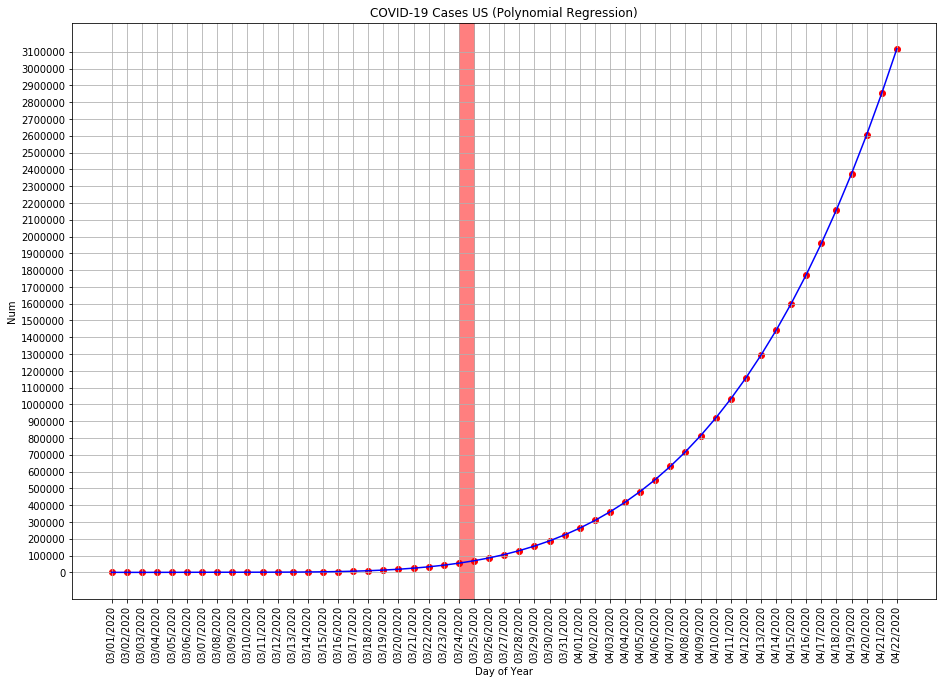

In [184]:
# Fitting Polynomial Regression to the dataset
poly_regf = PolynomialFeatures(degree=4)
x_polyf = poly_regf.fit_transform(xf)
pol_regf = LinearRegression()
pol_regf.fit(x_polyf, yf)

# Visualizing the Polymonial Regression results
def vizf_polymonial():
    fig = plt.figure(figsize=(15,10))
    axes = fig.add_axes([0.0,0.0,0.8,0.8])
    axes.scatter(datesfuture, yf, color='red')
    axes.plot(datesfuture, pol_regf.predict(poly_regf.fit_transform(xf)), color='blue')
    #axes.ticklabel_format(useOffset=False, style='plain')
    plt.title('COVID-19 Cases US (Polynomial Regression)')
    plt.xlabel('Day of Year')
    plt.ylabel('Num')
    axes.set_yticks(np.arange(0, casesfuture[-1], 100000))
    plt.grid()
    plt.xticks(rotation=90)
    plt.axvspan(nowstart,nowend, color='red', alpha=0.5)
    plt.show()
    return
vizf_polymonial()